<h2> Importing Libraries</h2>

In [1]:
import keras
from keras import layers
import pandas as pd
import numpy as np

<h2>Creating The Model</h2>

In [2]:
# This is the size of our encoded representations
encoding_dim = 60  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(122,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=keras.layers.LeakyReLU(alpha=0.1))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation=keras.layers.LeakyReLU(alpha=0.1))(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [3]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

<h2>Read && Split The Data<h2>

In [4]:
df = pd.read_csv('C:\\Users\\engse\\Documents\\GANs(Circles)\Geom.csv')
x_train = np.array(df.iloc[:17])
x_test = np.array(df.iloc[17:])

In [5]:
print("x_train's shape: " + str(x_train.shape))
print("x_test's shape: " + str(x_test.shape))

x_train's shape: (17, 122)
x_test's shape: (5, 122)


<h2> Fitting Model On Trainning Data (Autoencoder) </h2>

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True)

Epoch 1/200
1/1 [==============================] - 1s 683ms/step - loss: 6956.0938
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 6474.4072
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 6062.5854
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 5698.5830
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 5400.0693
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 5157.6904
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 4950.8115
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 4782.9297
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 4644.3198
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 4516.4917
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 4392.8623
Epoch 12/200
1/1 [==============================] - 0s 3ms/step - loss: 4250.8193
Epoch 13/200
1/1 [=====

<h2> Encode && Decode The Test Data (Using Encoder && Decoder Models) </h2>

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

<h2> Plotting The Original Test Circles && The Decoded onces </h2>

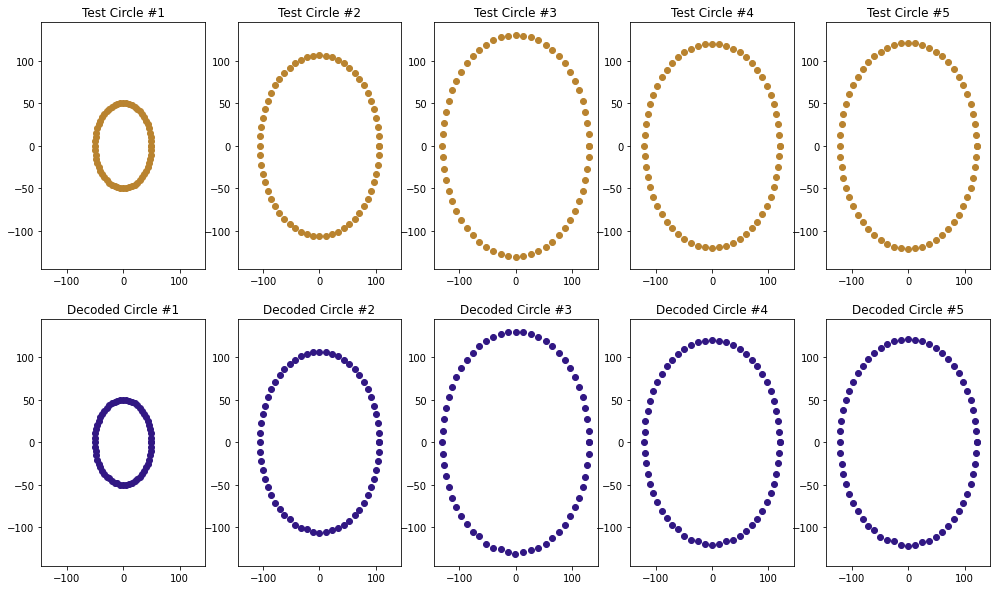

In [8]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 5  # How many digits we will display
plt.figure(figsize=(17, 10))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.xlim(-df.max().max(), df.max().max())
    plt.ylim(-df.max().max(), df.max().max())
    x_test_X, x_test_Y = x_test[i][::2], x_test[i][1::2] 
    plt.title("Test Circle #" + str(i + 1))
    plt.scatter(x_test_X, x_test_Y, color = "#b9832f") 
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.xlim(-df.max().max(), df.max().max())
    plt.ylim(-df.max().max(), df.max().max())
    decoded_imgs_X, decoded_imgs_Y = decoded_imgs[i][::2], decoded_imgs[i][1::2]
    plt.title("Decoded Circle #" + str(i + 1))
    plt.scatter(decoded_imgs_X, decoded_imgs_Y, color = "#311783") 
plt.show()

<h2>MSE Between The Test Circles Points and Its Reconstructed Circles Points</h2>

In [9]:
from sklearn.metrics import mean_squared_error
for i in range(x_test.shape[0]):
    MSE = mean_squared_error(x_test[i], decoded_imgs[i])
    print(f"MSE Between Test Circle #{i+1} and Decoded Circle #{i+1} = {MSE}")

MSE Between Test Circle #1 and Decoded Circle #1 = 0.017288737474339184
MSE Between Test Circle #2 and Decoded Circle #2 = 0.07755917467373256
MSE Between Test Circle #3 and Decoded Circle #3 = 0.11679980962395724
MSE Between Test Circle #4 and Decoded Circle #4 = 0.09946962545814164
MSE Between Test Circle #5 and Decoded Circle #5 = 0.10113948445991623
